<a href="https://colab.research.google.com/github/floudata/apuntes/blob/main/Sesion4_GameIA_Heuristicas_Hanoi_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diplomatura de Especialización en Desarrollo de Aplicaciones con Inteligencia Artificial - Inteligencia Artificial para Juegos (Game IA) - Sesión 4 - Tarea


<img src='https://www.danielsaromo.xyz/assets/img/logo-pucp.png' width=200px>


Dr. Edwin Villanueva, Ing. Daniel Saromo

<font color='orange'>Entorno de las Torres de Hanoi con heurísticas</font>

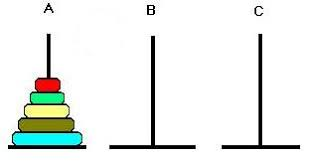


Completar con su código los campos requeridos y subir su notebook solucionado a la plataforma PAIDEIA. El formato del nombre del notebook es: `Desafio4_Hanoi_APELLIDOPATERNO_NOMBRE.ipynb`.

Es responsabilidad del alumno verificar que el archivo que subió es el correcto. Respetar los lineamientos de la entrega de archivo, ya que influirá en su calificación. La fecha límite de entrega del presente desafío se encuentra en PAIDEIA. No se aceptarán entregas luego de haberse publicado el solucionario.

## Clase Hanoi

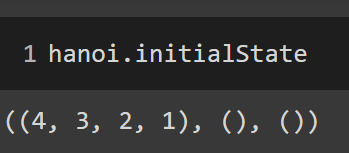

Descripción del entorno

- **State:** Tupla de `numCols` tuplas. Dentro de cada tupla interna, los índices representan el diámetro de los discos. Además, en dichas tuplas internas, mientras más a la izquierda estén los números (enteros), significa que más abajo están en la torre Hanoi.

- **Action:** Tupla de dos números enteros. El primer elemento representa el índice de la torre fuente del disco, y el segundo representa el índice de la torre destino.

In [ ]:
# -*- coding: utf-8 -*-

class Hanoi:
  def __init__(self, n, numCols=3, initialState=None, goalState=None):
    self.n = n #Número de discos totales
    self.numCols = numCols
    if(initialState == None):
      self.initialState = [() for i in range(numCols)]
      self.initialState[0] = tuple(range(n,0,-1))
    else:
      self.initialState = initialState

    if(goalState == None):
      self.goalState = [() for i in range(numCols)]
      self.goalState[self.numCols-1] = tuple(range(n,0,-1))
    else:
      self.goalState = goalState

    assert(self.numCols == len(self.initialState)), "El estado inicial debe tener "+str(self.numCols)+" torres!"
    assert(self.numCols == len(self.goalState)),    "El estado objetivo debe tener "+str(self.numCols)+" torres!"

    #Convertimos los estados a tuplas
    #como los estados se van a agregar a un set, no pueden ser listas
    #no se puede agregar una lista a un set
    self.initialState = tuple( self.initialState )
    self.goalState = tuple( self.goalState )

    #def __str__(self):

  def lookTopDiskOfTower(self, hanoiState, numTower):
    """De una tupla que representa el estado de las torres de hanoi,
    retorna el disco que está en la parte superior de una torre no vacía
    cuyo índice es numTower"""
    assert type(numTower)==int, "numTower debe ser un entero"
    assert numTower > -1, "numTower debe ser positivo"
    assert numTower < self.numCols, "numTower debe ser menor que la cantidad de torres"

    return hanoiState[numTower][len(hanoiState[numTower])-1]

  def toTuple(self, var):
    """Convierte a tupla una variable y sus elementos"""
    return tuple(tuple(x) for x in var)

  def toList(self, var):
      """Convierte a lista una variable y sus elementos"""
      return list(list(x) for x in var)

  def imprimeEstado(self, estado):
    """Imprime en pantalla el estado de las torres de Hanoi."""

    estado = self.toList(estado)

    torresFull = []
    charVarilla = "|"
    espaciado = "  "
    torresCadena = ""
    for torre in estado:
      torreDeChars = [str(disco) for disco in torre]
      while(len(torreDeChars)<self.n):
        torreDeChars.append(charVarilla)
      torresFull.append(torreDeChars)

    for i in range(self.n):
      for torreDeChars in torresFull:
        torresCadena+=(espaciado)
        torresCadena+=((torreDeChars.pop()))
      torresCadena+=("\n")

    print(torresCadena)

  def actions(self, state): # TO DO ! AQUÍ DEBE MODIFICAR ESTA FUNCIÓN DE ESTA CLASE (class Hanoi)
    """Retorna una lista con las acciones legales desde el estado actual. Cada acción es
    una tupla de tamaño 2, donde el primer elemento es el índice de la torre de donde se
    sacará un disco, y el segundo elemento es el índice de la torre a donde se desea
    llevar dicho disco """

    # Se brinda una estructura base, si desea puede usar una estructura propia totalmente diferente

    state = toTuple( ... )
    towers_from = [...] # como torres origen, tomo aquellas torres no vacías
    ... = []
    for ... in range(....numCols): #para cada una de las torres destino...
      for ... in ...: #para cada una de las torres origen...
        if j != i: #no se puede llevar un disco hacia la misma torre origen
          if(...): #si la torre destino está vacía
            acciones.append(...)
          # verifico que el disco en la parte superior de la torre destino sea mayor al disco que quiero colocar
          elif(self....(...,i) ... ...): # usar self.lookTopDiskOfTower(state,...) dos veces
            ....append((...,...))
    return ...

  def result(self, state, action): # TO DO ! AQUÍ DEBE MODIFICAR ESTA FUNCIÓN DE ESTA CLASE (class Hanoi)
    """Retorna el estado que resulta de ejecutar la accion dada desde la celda actual.
    La accion debe ser alguna de self.actions(state).
    action: Es una tupla de dos elementos (indice de la torre fuente e indice de la torre destino)
    state: tupla de numCols tuplas."""
    ...,... = action
    ... = self.toList(...)
    disk = ...[...].pop()
    ...
    return self.toTuple(...) #convierto en tupla a newState y sus elementos

  def ejecutaYmuestra(self, estadoInicial, acciones):
    """Ejecuta una serie de acciones ingresadas en la lista de tuplas denominada `acciones`,
    partiendo de `estadoInicial`."""

    print("Estado Inicial:")
    self.imprimeEstado(estadoInicial)
    acciones.reverse()
    estadoActual=estadoInicial
    while(len(acciones)>0):
      accionMovil = acciones.pop()
      estadoActual = self.result(estadoActual, accionMovil)
      print("Acción a ejecutar:",accionMovil)
      print()
      print("Estado de las torres de Hanoi resultante:")
      self.imprimeEstado(estadoActual)

  def __str__(self):
    """Imprime el estado inicial y el estado objetivo del entorno de Hanoi."""
    print("Estado inicial:")
    self.imprimeEstado(self.initialState)
    print("Estado objetivo:")
    self.imprimeEstado(self.goalState)
    return "Se imprimieron el estado inicial y el estado objetivo del entorno de Hanoi."

## Algoritmos de Búsqueda

### Clase <b>SearchProblem</b>

Esta es una clase abstracta para definir problemas de busqueda. Se debe hacer subclases que implementen los metodos de las acciones, resultados, test de objetivo y el costo de camino. Entonces se puede instanciar las subclases y resolverlos con varias funciones de busqueda.

In [ ]:
class SearchProblem(object):
    def __init__(self, initial, goal=None):
        """Este constructor especifica el estado inicial y posiblemente el estado(s) objetivo(s),
        La subclase puede añadir mas argumentos."""
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        """Retorna las acciones que pueden ser ejecutadas en el estado dado.
        El resultado es tipicamente una lista."""
        raise NotImplementedError

    def result(self, state, action):
        """Retorna el estado que resulta de ejecutar la accion dada en el estado state.
        La accion debe ser alguna de self.actions(state)."""
        raise NotImplementedError

    def goal_test(self, state):
        """Retorna True si el estado pasado satisface el objetivo."""
        raise NotImplementedError

    def path_cost(self, c, state1, action, state2):
        """Retorna el costo del camino de state2 viniendo de state1 con
        la accion action, asumiendo un costo c para llegar hasta state1.
        El metodo por defecto cuesta 1 para cada paso en el camino."""
        return c + 1

### Clase <b>Node</b>

Estructura de datos para almacenar la informacion de un nodo en un <b>arbol de busqueda</b>. Contiene información del nodo padre y el estado que representa el nodo. Tambien incluye la accion que nos llevo al presente nodo y el costo total del camino desde el nodo raiz hasta este nodo.

In [ ]:
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        "Crea un nodo de arbol de busqueda, derivado del nodo parent y accion action"
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1

    def expand(self, problem):
        "Devuelve los nodos alcanzables en un paso a partir de este nodo."
        return [self.child_node(problem, action)
                for action in problem.actions(self.state)]

    def child_node(self, problem, action):
        next = problem.result(self.state, action)
        return Node(next, self, action,
                    problem.path_cost(self.path_cost, self.state, action, next))

    def solution(self):
        "Retorna la secuencia de acciones para ir de la raiz a este nodo."
        return [node.action for node in self.path()[1:]]

    def path(self):
        "Retorna una lista de nodos formando un camino de la raiz a este nodo."
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))

    def __lt__(self, node):
        return self.state < node.state

    def __eq__(self, other):
        "Este metodo se ejecuta cuando se compara nodos. Devuelve True cuando los estados son iguales"
        return isinstance(other, Node) and self.state == other.state

    def __repr__(self):
        return "<Node {}>".format(self.state)

    def __hash__(self):
        return hash(self.state)

### <b> Frontera tipo cola FIFO (first-in first out) para BFS</b>

In [ ]:
from collections import deque

class FIFOQueue(deque):
    """Una cola First-In-First-Out"""
    def pop(self):
        return self.popleft()

### <b> Frontera tipo cola de prioridad ordenada por una funcion de costo (para best_first_graph_search y A*)</b>

In [ ]:
import heapq
class FrontierPQ:
    "Una Frontera ordenada por una funcion de costo (Priority Queue)"

    def __init__(self, initial, costfn=lambda node: node.path_cost):
        "Inicializa la Frontera con un nodo inicial y una funcion de costo especificada (por defecto es el costo de camino)."
        self.heap   = []
        self.states = {}
        self.costfn = costfn
        self.add(initial)

    def add(self, node):
        "Agrega un nodo a la frontera."
        cost = self.costfn(node)
        heapq.heappush(self.heap, (cost, node))
        self.states[node.state] = node

    def pop(self):
        "Remueve y retorna el nodo con minimo costo."
        (cost, node) = heapq.heappop(self.heap)
        self.states.pop(node.state, None) # remove state
        return node

    def replace(self, node):
        "node reemplaza al nodo de la Fontera que tiene el mismo estado que node."
        if node.state not in self:
            raise ValueError('{} no tiene nada que reemplazar'.format(node.state))
        for (i, (cost, old_node)) in enumerate(self.heap):
            if old_node.state == node.state:
                self.heap[i] = (self.costfn(node), node)
                heapq._siftdown(self.heap, 0, i)
                return

    def __contains__(self, state): return state in self.states

    def __len__(self): return len(self.heap)

### <b>Algoritmo general de búsqueda con memoria de nodos expandidos (Graph Search)</b>

Algoritmo de general de busqueda ciega con memoria de estados visitados. El argumento frontier debe ser una cola vacia. Si la frontera es tipo FIFO hace busqueda en amplitud (BFS), si la frontera es una pila hará busqueda en profundidad (DFS)

In [ ]:
def graph_search(problem, frontier):
    frontier.append(Node(problem.initial))
    explored = set()     # memoria de estados visitados
    visited_nodes = []   # almacena nodos visitados durante la busqueda
    while frontier:
        node = frontier.pop()
        visited_nodes.append(node)
        if problem.goal_test(node.state):
            return node, visited_nodes
        explored.add(node.state)

        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and
                        child not in frontier)
    return None

### <b> Algoritmo Best-First-Graph-Search </b>
Algoritmo general de busqueda con información. La frontera es una cola de prioridad ordenada por la funcion de evaluacion f

In [ ]:
def best_first_graph_search(problem, f):
    """Busca el objetivo expandiendo el nodo de la frontera con el menor valor de la funcion f. Memoriza estados visitados
    Antes de llamar a este algoritmo hay que especificar La funcion f(node). Si f es node.depth tenemos Busqueda en Amplitud;
    si f es node.path_cost tenemos Busqueda  de Costo Uniforme. Si f es una heurística tenemos Busqueda Voraz;
    Si f es node.path_cost + heuristica(node) tenemos A* """

    frontier = FrontierPQ( Node(problem.initial), f )  # frontera tipo cola de prioridad ordenada por f
    explored = set()     # memoria de estados visitados
    visited_nodes = []   # almacena nodos visitados durante la busqueda
    while frontier:
        node = frontier.pop()
        visited_nodes.append(node)
        if problem.goal_test(node.state):
            return node, visited_nodes
        explored.add(node.state)
        for action in problem.actions(node.state):
            child = node.child_node(problem, action)
            if child.state not in explored and child.state not in frontier:
                frontier.add(child)
            elif child.state in frontier:
                incumbent = frontier.states[child.state]
                if f(child) < f(incumbent):
                    frontier.replace(child)

### <b> Algoritmo A* </b>
A* es un caso especial de best_first_graph_search con f = path_cost + heuristic

In [ ]:
def astar_search(problem, heuristic):
    f = lambda node: node.path_cost + heuristic(node, problem)
    return best_first_graph_search(problem, f)

def nullheuristic(node, problem):
    return 0

### <b> Heurísticas para A* </b>
Se debe implementar las heurísticas abajo para A*

In [ ]:
def h1(node, problem):
  """Cantidad de discos de node.state que están fuera de su torre destino indicada en el
    estado objetivo (problem.goal). Además, se considera que un disco SÍ está fuera de su lugar
    si es que no está en su posición correcta dentro de la torre destino."""
  return h1_explicit(node.state, problem.goal)

def h1_explicit(aa, bb):
    """Para los estados `aa` y `bb`, calcula la cantidad de discos de `aa` que están fuera de
    su torre destino indicada en `bb`. Cada estado ingresado es una tupla de tuplas.
    Por ejemplo:
    Para `aa = ((4,3,2,1),(),())` y `bb = ((),(),(4,3,2,1))`, se tiene que `h1_explicit(aa,bb)=4`."""
    # se brinda una estructura base para la heurística. si desea puede usar una totalmente diferente
    #inicialmente, asumimos que todos los discos están fuera de su columna correcta
    cantDiscosWrong = sum(len(...) for x in ...)

    for numTorre in range(...(aa)):#para cada una de las torres del estado inicial
      for ..., disco in enumerate(aa[numTorre]):#para cada disco dentro de dichas torres
        if (disco in ...[numTorre]):
          # si un disco está en la torre destino, recién voy a consultar si está en su posición correcta
          if (i < len(...[numTorre])):
            # si un disco está en su posición correcta dentro de la torre inicial y destino,
            # su posición en la torre inicial debe ser menor o igual a la altura de la torre destino
            if (disco == ...[...][i]):
              # este disco no es incorrecto, ya que está en su torre correcta y en su posicion correcta en la torre
              cantDiscosWrong=cantDiscosWrong-1

    return cantDiscosWrong

#### Heurística H weighted

In [ ]:
def h_weighted(node, problem, W=5, h_base = h1):
    # pongo straightline_dist en lugar de manh, porque
    # en este entorno eucl explora más nodos, y se ve más el efecto de usar W
    "Heurística que domina a las heurísticas cuantificadas por las distancias `straightline_dist` y `manhatan_dist`."
    return W * h_base(node, problem)

#### Verificación visual de la heurística h1

Las siguientes líneas permiten la verificación de la heurística que se tiene que implementar. Sin embargo, la implementación de la función `h1_explicit` debe ser general, ya que al momento de la revisión del notebook, se va a probar con otras parejas de estados Hanoi inicial y destino. Estos estados pueden tener diferente cantidad de torres (mayor a 2), y diferente cantidad de discos por torre. Sin embargo, en los estados a probarse, los discos de cada torre estarán en orden decreciente empezando desde abajo.

In [ ]:
print(Hanoi(4, initialState=((4,3,2,1),(),()), goalState=((),(),(4,3,2,1))))

Estado inicial:
  1  |  |
  2  |  |
  3  |  |
  4  |  |

Estado objetivo:
  |  |  1
  |  |  2
  |  |  3
  |  |  4

Se imprimieron el estado inicial y el estado objetivo del entorno de Hanoi.


In [ ]:
assert 4==h1_explicit( ((4,3,2,1),(),()) , ((),(),(4,3,2,1)) ), "Hay 4 discos fuera de su torre destino. Corregir `h1_explicit`."

-------------------

In [ ]:
print(Hanoi(4, initialState=((4,2),(3,),(1,)), goalState=((4,3,2),(1,),())))

Estado inicial:
  |  |  |
  |  |  |
  2  |  |
  4  3  1

Estado objetivo:
  |  |  |
  2  |  |
  3  |  |
  4  1  |

Se imprimieron el estado inicial y el estado objetivo del entorno de Hanoi.


In [ ]:
assert 3==h1_explicit( ((4,2),(3,),(1,)) , ((4,3,2),(1,),()) ), "Hay 3 discos fuera de su torre destino. Corregir `h1_explicit`."

--------------

In [ ]:
print(Hanoi(4, initialState=((4,2,1),(3,),()), goalState=((4,3,2,1),(),())))

Estado inicial:
  |  |  |
  1  |  |
  2  |  |
  4  3  |

Estado objetivo:
  1  |  |
  2  |  |
  3  |  |
  4  |  |

Se imprimieron el estado inicial y el estado objetivo del entorno de Hanoi.


In [ ]:
assert 3==h1_explicit( ((4,2,1),(3,),()) , ((4,3,2,1),(),()) ), "Hay 3 discos fuera de su torre destino. Corregir `h1_explicit`."

--------------

In [ ]:
print(Hanoi(4, initialState=((4,2),(3,1),()), goalState=((4,3,2),(1,),())))

Estado inicial:
  |  |  |
  |  |  |
  2  1  |
  4  3  |

Estado objetivo:
  |  |  |
  2  |  |
  3  |  |
  4  1  |

Se imprimieron el estado inicial y el estado objetivo del entorno de Hanoi.


In [ ]:
assert 3==h1_explicit( ((4,2),(3,1),()) , ((4,3,2),(1,),()) ), "Hay 3 discos fuera de su torre destino. Corregir `h1_explicit`."

--------------

In [ ]:
print(Hanoi(5, initialState=((5,4,3,1),(),(2,)), goalState=((5,1),(3,),(4,2))))

Estado inicial:
  |  |  |
  1  |  |
  3  |  |
  4  |  |
  5  |  2

Estado objetivo:
  |  |  |
  |  |  |
  |  |  |
  1  |  2
  5  3  4

Se imprimieron el estado inicial y el estado objetivo del entorno de Hanoi.


In [ ]:
assert 4==h1_explicit( ((5,4,3,1),(),(2,)) , ((5,1),(3,),(4,2)) ), "Hay 4 discos  fuera de su torre destino. Corregir `h1_explicit`."

--------------

In [ ]:
print(Hanoi(4, initialState=((),(2,1),(4,3)), goalState=((),(),(4,3,2,1))))

Estado inicial:
  |  |  |
  |  |  |
  |  1  3
  |  2  4

Estado objetivo:
  |  |  1
  |  |  2
  |  |  3
  |  |  4

Se imprimieron el estado inicial y el estado objetivo del entorno de Hanoi.


In [ ]:
assert 2==h1_explicit( ((),(2,1),(4,3)) , ((),(),(4,3,2,1)) ), "Hay 2 discos fuera de su torre destino. Corregir `h1_explicit`."

--------------

In [ ]:
print(Hanoi(6, initialState=((),(6,5,3,1),(2,4)), goalState=((5,3,1),(4,2),(6,))))

Estado inicial:
  |  |  |
  |  |  |
  |  1  |
  |  3  |
  |  5  4
  |  6  2

Estado objetivo:
  |  |  |
  |  |  |
  |  |  |
  1  |  |
  3  2  |
  5  4  6

Se imprimieron el estado inicial y el estado objetivo del entorno de Hanoi.


In [ ]:
assert 6==h1_explicit( ((),(6,5,3,1),(2,4)) , ((5,3,1),(4,2),(6,)) ), "Hay 6 discos fuera de su torre destino. Corregir `h1_explicit`."

## Clases para el entorno Hanoi

###  <b> Clase HanoiSearchProblem </b>  
Esta es una subclase de SearchProblem que implementa concretamente el problema de busqueda en laberinto. El constructor recibe el laberinto en un objeto maze. Cada estado es codificado como una tupla (row,col) representando la posicion de una celda del grid. El estado inicial es la celda de inicio y el único estado objetivo es la celda de salida.
Se necesita completar Actions (acciones legales para un estado dado) y result (que hacen las acciones).

In [ ]:
def toTuple(var):
    """Convierte a tupla una variable y sus elementos"""
    return tuple(tuple(x) for x in var)

def toList(var):
    """Convierte a lista una variable y sus elementos"""
    return list(list(x) for x in var)

class HanoiSearchProblem(SearchProblem):
    def __init__(self, hanoi, toTuple=toTuple):
      self.hanoi = hanoi
      self.initial = toTuple( hanoi.initialState )
      self.goal = toTuple( hanoi.goalState )
      self.numNodesExpanded = 0

    def isValidState(self,state):
        """ Retorna true si el estado dado corresponde a una configuración de hanoi valida """
        raise NotImplementedError

    def actions(self, state):
        """Retorna una lista con las acciones legales desde el estado actual. Cada acción es
        una tupla de tamaño 2, donde el primer elemento es el índice de la torre de donde se
        sacará un disco, y el segundo elemento es el índice de la torre a donde se desea
        llevar dicho disco """

        return self.hanoi.actions(state)

    def result(self, state, action):
        """Retorna el estado que resulta de ejecutar la accion dada desde la celda actual.
        La accion debe ser alguna de self.actions(state)"""
        #Por comodidad, lo implementé dentro de la clase Hanoi, ya que este código se reutiliza al
        #momento de ejecutar las acciones de la solución

        return self.hanoi.result(state, action)

    def goal_test(self, state):
        """Retorna True si state es self.goal"""
        return (self.goal == state)

Genera el error: TypeError: unhashable type: 'list'
Es porque no se puede agregar una lista a un set
https://stackoverflow.com/questions/1306631/python-add-list-to-set
En el entorno del 8puzzle, usan strings, y los strings son inmutables!
https://medium.com/@meghamohan/mutable-and-immutable-side-of-python-c2145cf72747

## <b> Experimentación con los algoritmos de Busqueda: Hanoi 4 + h1</b>


In [ ]:
""" Instancia el problema de busqueda en el entorno de las torres de Hanoi """
hanoi = Hanoi(4)
print(hanoi)
p = HanoiSearchProblem(hanoi)

Estado inicial:
  1  |  |
  2  |  |
  3  |  |
  4  |  |

Estado objetivo:
  |  |  1
  |  |  2
  |  |  3
  |  |  4

Se imprimieron el estado inicial y el estado objetivo del entorno de Hanoi.


### busqueda en amplitud (BFS)

In [ ]:
nsol, visited_nodes = graph_search(p, FIFOQueue())
print('Solucion BFS:',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion BFS: [(0, 1), (0, 2), (1, 2), (0, 1), (2, 0), (2, 1), (0, 1), (0, 2), (1, 2), (1, 0), (2, 0), (1, 2), (0, 1), (0, 2), (1, 2)]
Nodos visitados = 71
Costo Solucion = 15


### busqueda en profundidad (DFS)

In [ ]:
nsol, visited_nodes = graph_search(p, [])
print('Solucion DFS:',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion DFS: [(0, 2), (0, 1), (2, 1), (0, 2), (1, 2), (1, 0), (2, 1), (0, 2), (1, 2), (0, 1), (2, 1), (2, 0), (1, 2), (0, 1), (2, 1), (2, 0), (1, 2), (1, 0), (2, 0), (1, 2), (0, 2), (0, 1), (2, 1), (0, 2), (1, 2), (1, 0), (2, 1), (0, 2), (1, 2)]
Nodos visitados = 43
Costo Solucion = 29


### busqueda A* con heurística nula (UCS)

In [ ]:
nsol, visited_nodes = astar_search(p, nullheuristic)
print('Solucion A* y heuristica nula (UCS):',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion A* y heuristica nula (UCS): [(0, 1), (0, 2), (1, 2), (0, 1), (2, 0), (2, 1), (0, 1), (0, 2), (1, 2), (1, 0), (2, 0), (1, 2), (0, 1), (0, 2), (1, 2)]
Nodos visitados = 66
Costo Solucion = 15


### busqueda A* con heurística h1

In [ ]:
nsol, visited_nodes = astar_search(p, h1)
print('Solucion A* y heuristica h1:',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion A* y heuristica h1: [(0, 1), (0, 2), (1, 2), (0, 1), (2, 0), (2, 1), (0, 1), (0, 2), (1, 2), (1, 0), (2, 0), (1, 2), (0, 1), (0, 2), (1, 2)]
Nodos visitados = 48
Costo Solucion = 15


## <b> Experimentación con los algoritmos de Busqueda: Hanoi 5 con initial y goal states manuales + h1</b>


In [ ]:
hanoi.initialState

((4, 3, 2, 1), (), ())

In [ ]:
""" Instancia el problema de busqueda en el entorno de las torres de Hanoi """
hanoi = Hanoi(5, initialState=((4,2),(1,),(5,3)), goalState=((3,2),(4,),(5,1)))
print(hanoi)
p = HanoiSearchProblem(hanoi)

Estado inicial:
  |  |  |
  |  |  |
  |  |  |
  2  |  3
  4  1  5

Estado objetivo:
  |  |  |
  |  |  |
  |  |  |
  2  |  1
  3  4  5

Se imprimieron el estado inicial y el estado objetivo del entorno de Hanoi.


### busqueda en amplitud (BFS)

In [ ]:
nsol, visited_nodes = graph_search(p, FIFOQueue())
print('Solucion BFS:',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion BFS: [(0, 2), (1, 2), (0, 1), (2, 0), (2, 1), (0, 1), (2, 0), (1, 2), (1, 0)]
Nodos visitados = 54
Costo Solucion = 9


### busqueda en profundidad (DFS)

In [ ]:
nsol, visited_nodes = graph_search(p, [])
print('Solucion DFS:',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion DFS: [(1, 2), (0, 1), (2, 1), (2, 0), (1, 2), (1, 0), (2, 1), (0, 2), (1, 2), (0, 1), (2, 1), (2, 0), (1, 2), (0, 1), (2, 1), (0, 2), (1, 2), (1, 0), (2, 1), (0, 2), (1, 2), (1, 0), (2, 1), (2, 0), (1, 0), (2, 1), (0, 2)]
Nodos visitados = 41
Costo Solucion = 27


In [ ]:
hanoi.ejecutaYmuestra(hanoi.initialState, nsol.solution())

Estado Inicial:
  |  |  |
  |  |  |
  |  |  |
  2  |  3
  4  1  5

Acción a ejecutar: (1, 2)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  |  |  1
  2  |  3
  4  |  5

Acción a ejecutar: (0, 1)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  |  |  1
  |  |  3
  4  2  5

Acción a ejecutar: (2, 1)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  |  |  |
  |  1  3
  4  2  5

Acción a ejecutar: (2, 0)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  |  |  |
  3  1  |
  4  2  5

Acción a ejecutar: (1, 2)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  |  |  |
  3  |  1
  4  2  5

Acción a ejecutar: (1, 0)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  2  |  |
  3  |  1
  4  |  5

Acción a ejecutar: (2, 1)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  2  |  |
  3  |  |
  4  1  5

Acción a ejecutar: (0, 2)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  | 

### busqueda A* con heurística nula (UCS)

In [ ]:
nsol, visited_nodes = astar_search(p, nullheuristic)
print('Solucion A* y heuristica nula (UCS):',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion A* y heuristica nula (UCS): [(0, 2), (1, 2), (0, 1), (2, 0), (2, 1), (0, 1), (2, 0), (1, 2), (1, 0)]
Nodos visitados = 56
Costo Solucion = 9


### busqueda A* con heurística h1

In [ ]:
nsol, visited_nodes = astar_search(p, h1)
print('Solucion A* y heuristica h1:',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion A* y heuristica h1: [(0, 2), (1, 2), (0, 1), (2, 0), (2, 1), (0, 1), (2, 0), (1, 2), (1, 0)]
Nodos visitados = 28
Costo Solucion = 9


In [ ]:
hanoi.ejecutaYmuestra(hanoi.initialState, nsol.solution())

Estado Inicial:
  |  |  |
  |  |  |
  |  |  |
  2  |  3
  4  1  5

Acción a ejecutar: (0, 2)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  |  |  2
  |  |  3
  4  1  5

Acción a ejecutar: (1, 2)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  1
  |  |  2
  |  |  3
  4  |  5

Acción a ejecutar: (0, 1)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  1
  |  |  2
  |  |  3
  |  4  5

Acción a ejecutar: (2, 0)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  |  |  2
  |  |  3
  1  4  5

Acción a ejecutar: (2, 1)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  |  |  |
  |  2  3
  1  4  5

Acción a ejecutar: (0, 1)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  |  1  |
  |  2  3
  |  4  5

Acción a ejecutar: (2, 0)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  |  1  |
  |  2  |
  3  4  5

Acción a ejecutar: (1, 2)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  | 

## Desafío de la semana: Entorno `Hanoi` <font color=red> (20 puntos) </font> - Solución propuesta

### Preguntas del desafío

- Implementación de la función `Hanoi.result`: <font color=red> (2 puntos) </font>.


- Implementación de la función `Hanoi.actions`: <font color=red> (3 puntos) </font>.


- Implementación de la heurística `h1` : Número de piezas fuera de su torre destino, sin importar que dichas fichas no se encuentren en la posición correcta dentro de la torre en la que deberían estar. Implementar la función de la heurística `h1` <font color=red> (3 puntos) </font>.


Notar que en la descripción de la función `h1`, se indica lo siguiente: `Cantidad de discos de node.state que están fuera de su torre destino indicada en el estado objetivo (problem.goal). Además, se considera que un disco SÍ está fuera de su lugar si es que no está en su posición correcta dentro de la torre destino.`.

Estas son las reglas del problema de las torres de Hanoi.

1. Sólo se puede mover un disco a la vez.
2. Para mover un disco, los demás deben estar en postes.
3. Un disco no puede estar sobre uno más pequeño que sí mismo.
4. Sólo se puede extraer el disco que se encuentra arriba de cada poste.
5. Un disco sólo puede moverse hacia la cima de otra torre.
6. Los discos son piezas físicas afectadas por la gravedad.




- ¿Cuáles son las reglas que se apagan para conseguir un problema relajado con esa heurística `h1`? **Justificar** <font color=red> (0.5 puntos por indicar el estado correcto de cada una de las 6 reglas: 3 puntos en total) </font>. Considerar que para las configuraciones de destino, los discos dentro de las torres **siempre** van a tener tamaños (en nuestro caso, representados con los valores numéricos asignados a los discos) diferentes y en orden decreciente empezando desde abajo.

Luego de justificar su elección de cuáles reglas deben ser apagadas, completar la siguiente tabla resumen:

Dato: La regla 6 no se debe apagar.


|  | Regla 1 | Regla 2 | Regla 3 | Regla 4 | Regla 5 |Regla 6 |
| :------- | :------: | -----: | -----: | -----: | -----: |-----: |
| Activa o apagada?  | ??      | ??   | ??  | ??   | ??   |??      |

- Completar la siguiente tabla. Luego, asumiendo que la heurística `h1` es consistente, indicar para cuáles valores de W la búsqueda es óptima y por qué. Contrastar sus resultados experimentales y la teoría vista en clase. <font color=red> (2 puntos por la tabla + 1 punto por responder la pregunta = 3 puntos) </font>:

Usar la siguiente configuración del entorno:

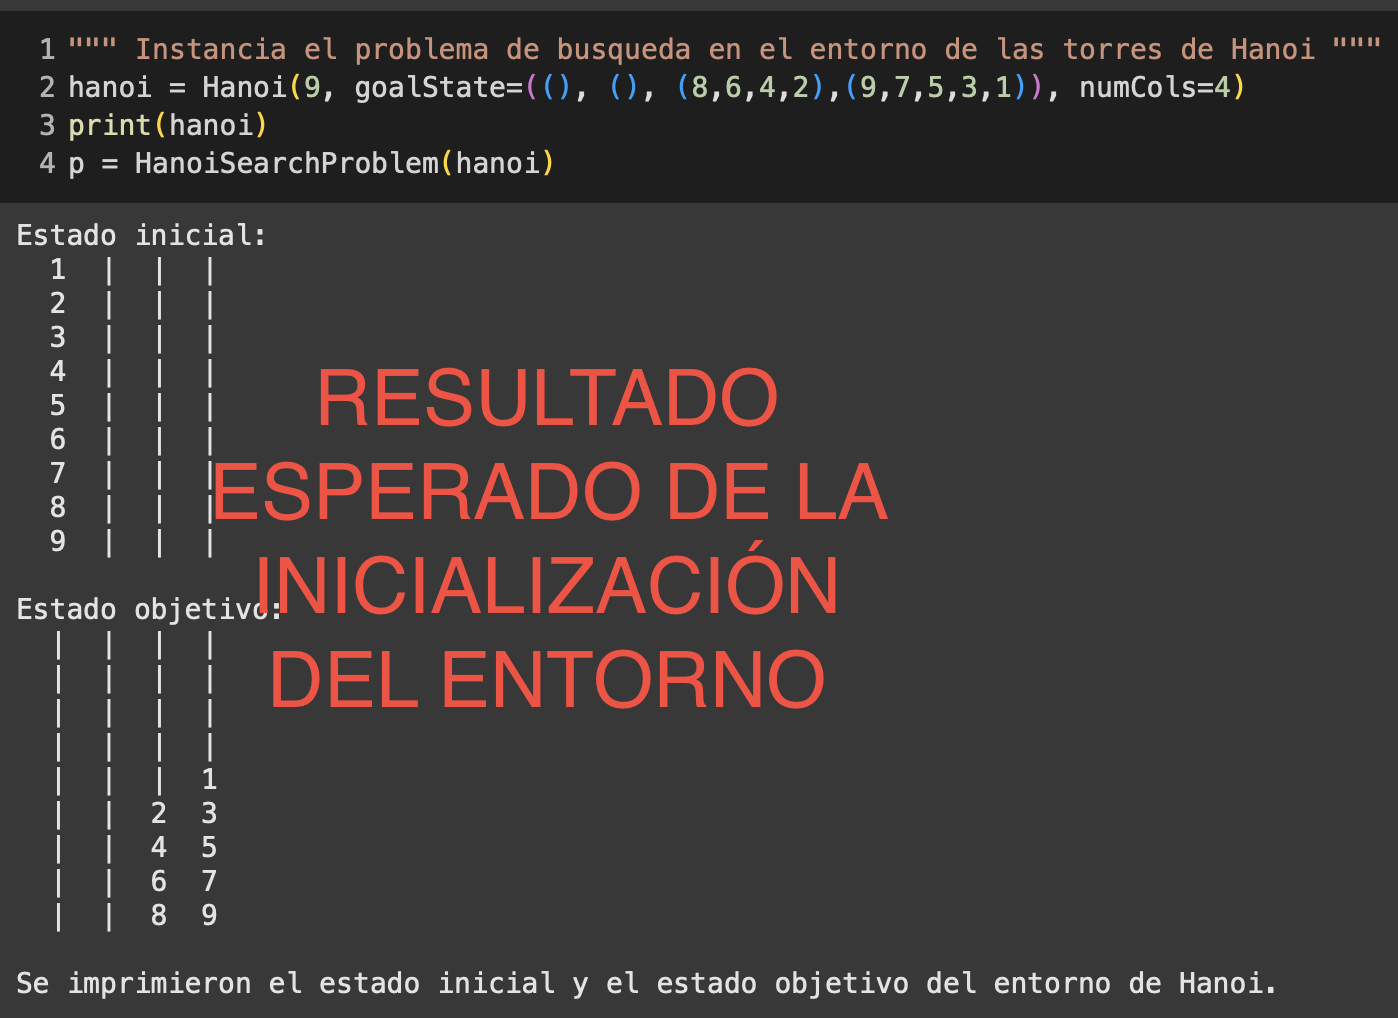

Debe mostrar los resultados de sus ejecuciones!

| W                               | 0  | 0.1 | 0.5 | 1  | 2  | 3  | 4  | 5  |
|---------------------------------|----|-----|-----|----|----|----|----|----|
| Cantidad de nodos explorados    | ?? | ??  | ??  | ?? | ?? | ?? | ?? | ?? |
| Costo de la solución encontrada | ?? | ??  | ??  | ?? | ?? | ?? | ?? | ?? |

Los datos de su tabla deben coincidir con los valores de la siguiente gráfica. No se solicita elaborar dicha gráfica, sino completar la tabla de arriba.

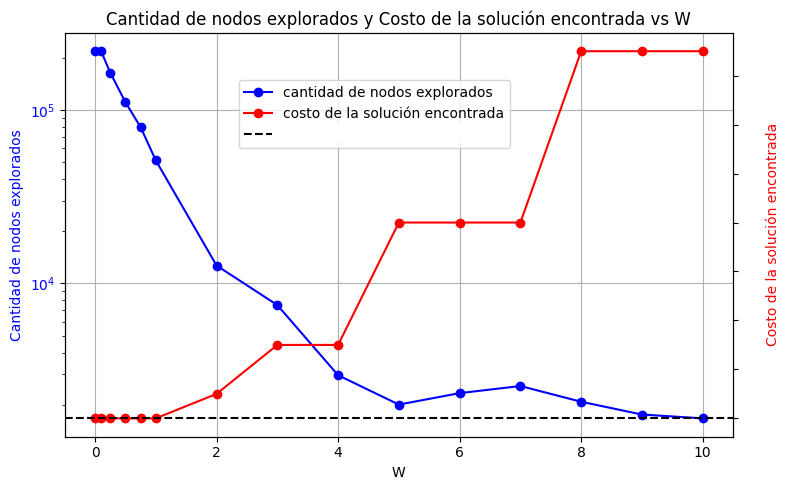

- Complete las siguiente tablas, **mostrando** los resultados de las ejecuciones <font color=red> (6 puntos) </font>:

<font color=red> (0.25 puntos por cada columna de cada una de las 3 tablas) </font>

Notar que se piden experimentos en las configuraciones de Hanoi por defecto (sin valores especificados por el usuario para los estados inicial y objetivo). Por ejemplo, en la tercera tabla se indica probar para el entorno `Hanoi(5)`, no `Hanoi(5, initialState=((4,2),(1,),(5,3)), goalState=((3,2),(4,),(5,1)))`.



| Entorno `Hanoi(3)` | BFS | DFS | UCS | A* con `h1` |
| :------- | :------: | -----: | -----: | -----: |
| Costo del camino  | ??      | ??   | ??  | ??   |
| Nodos visitados   | ??     | ?? | ?? | ?? |




| Entorno `Hanoi(4)` | BFS | DFS | UCS | A* con `h1` |
| :------- | :------: | -----: | -----: | -----: |
| Costo del camino  | ??      | ??   | ??  | ??   |
| Nodos visitados   | ??     | ?? | ?? | ?? |



| Entorno `Hanoi(5)` | BFS | DFS | UCS | A* con `h1` |
| :------- | :------: | -----: | -----: | -----: |
| Costo del camino  | ??      | ??   | ??  | ??   |
| Nodos visitados   | ??     | ?? | ?? | ?? |

### Entorno `Hanoi(3)`

In [ ]:
""" Instancia el problema de busqueda en el entorno de las torres de Hanoi """
hanoi = Hanoi(3)
print(hanoi)
p = HanoiSearchProblem(hanoi)

Estado inicial:
  1  |  |
  2  |  |
  3  |  |

Estado objetivo:
  |  |  1
  |  |  2
  |  |  3

Se imprimieron el estado inicial y el estado objetivo del entorno de Hanoi.


#### busqueda en amplitud (BFS)

In [ ]:
nsol, visited_nodes = graph_search(p, FIFOQueue())
print('Solucion BFS:',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion BFS: [(0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2)]
Nodos visitados = 25
Costo Solucion = 7


#### busqueda en profundidad (DFS)

In [ ]:
nsol, visited_nodes = graph_search(p, [])
print('Solucion DFS:',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion DFS: [(0, 2), (0, 1), (2, 1), (0, 2), (1, 2), (1, 0), (2, 1), (0, 2), (1, 2)]
Nodos visitados = 10
Costo Solucion = 9


#### busqueda A* con heurística nula (UCS)

In [ ]:
nsol, visited_nodes = astar_search(p, nullheuristic)
print('Solucion A* y heuristica nula (UCS):',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion A* y heuristica nula (UCS): [(0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2)]
Nodos visitados = 20
Costo Solucion = 7


#### busqueda A* con heurística h1

In [ ]:
nsol, visited_nodes = astar_search(p, h1)
print('Solucion A* y heuristica h1:',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion A* y heuristica h1: [(0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2)]
Nodos visitados = 15
Costo Solucion = 7


### Entorno `Hanoi(4)`

In [ ]:
""" Instancia el problema de busqueda en el entorno de las torres de Hanoi """
hanoi = Hanoi(4)
print(hanoi)
p = HanoiSearchProblem(hanoi)

Estado inicial:
  1  |  |
  2  |  |
  3  |  |
  4  |  |

Estado objetivo:
  |  |  1
  |  |  2
  |  |  3
  |  |  4

Se imprimieron el estado inicial y el estado objetivo del entorno de Hanoi.


#### busqueda en amplitud (BFS)

In [ ]:
nsol, visited_nodes = graph_search(p, FIFOQueue())
print('Solucion BFS:',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion BFS: [(0, 1), (0, 2), (1, 2), (0, 1), (2, 0), (2, 1), (0, 1), (0, 2), (1, 2), (1, 0), (2, 0), (1, 2), (0, 1), (0, 2), (1, 2)]
Nodos visitados = 71
Costo Solucion = 15


#### busqueda en profundidad (DFS)

In [ ]:
nsol, visited_nodes = graph_search(p, [])
print('Solucion DFS:',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion DFS: [(0, 2), (0, 1), (2, 1), (0, 2), (1, 2), (1, 0), (2, 1), (0, 2), (1, 2), (0, 1), (2, 1), (2, 0), (1, 2), (0, 1), (2, 1), (2, 0), (1, 2), (1, 0), (2, 0), (1, 2), (0, 2), (0, 1), (2, 1), (0, 2), (1, 2), (1, 0), (2, 1), (0, 2), (1, 2)]
Nodos visitados = 43
Costo Solucion = 29


#### busqueda A* con heurística nula (UCS)

In [ ]:
nsol, visited_nodes = astar_search(p, nullheuristic)
print('Solucion A* y heuristica nula (UCS):',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion A* y heuristica nula (UCS): [(0, 1), (0, 2), (1, 2), (0, 1), (2, 0), (2, 1), (0, 1), (0, 2), (1, 2), (1, 0), (2, 0), (1, 2), (0, 1), (0, 2), (1, 2)]
Nodos visitados = 66
Costo Solucion = 15


#### busqueda A* con heurística h1

In [ ]:
nsol, visited_nodes = astar_search(p, h1)
print('Solucion A* y heuristica h1:',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion A* y heuristica h1: [(0, 1), (0, 2), (1, 2), (0, 1), (2, 0), (2, 1), (0, 1), (0, 2), (1, 2), (1, 0), (2, 0), (1, 2), (0, 1), (0, 2), (1, 2)]
Nodos visitados = 48
Costo Solucion = 15


### Entorno `Hanoi(5)`

In [ ]:
""" Instancia el problema de busqueda en el entorno de las torres de Hanoi """
hanoi = Hanoi(5)
print(hanoi)
p = HanoiSearchProblem(hanoi)

Estado inicial:
  1  |  |
  2  |  |
  3  |  |
  4  |  |
  5  |  |

Estado objetivo:
  |  |  1
  |  |  2
  |  |  3
  |  |  4
  |  |  5

Se imprimieron el estado inicial y el estado objetivo del entorno de Hanoi.


#### busqueda en amplitud (BFS)

In [ ]:
nsol, visited_nodes = graph_search(p, FIFOQueue())
print('Solucion BFS:',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion BFS: [(0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2), (0, 1), (2, 1), (2, 0), (1, 0), (2, 1), (0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2), (1, 0), (2, 1), (2, 0), (1, 0), (1, 2), (0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2)]
Nodos visitados = 233
Costo Solucion = 31


#### busqueda en profundidad (DFS)

In [ ]:
nsol, visited_nodes = graph_search(p, [])
print('Solucion DFS:',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion DFS: [(0, 2), (0, 1), (2, 1), (0, 2), (1, 2), (1, 0), (2, 1), (0, 2), (1, 2), (0, 1), (2, 1), (2, 0), (1, 2), (0, 1), (2, 1), (2, 0), (1, 2), (1, 0), (2, 1), (0, 2), (1, 2), (0, 1), (2, 1), (2, 0), (1, 2), (0, 1), (2, 1), (0, 2), (1, 2), (1, 0), (2, 1), (0, 2), (1, 2), (1, 0), (2, 1), (2, 0), (1, 2), (0, 1), (2, 1), (0, 2), (1, 2), (1, 0), (2, 1), (0, 2), (1, 2), (1, 0), (2, 1), (2, 0), (1, 2), (0, 1), (2, 1), (2, 0), (1, 2), (1, 0), (2, 1), (0, 2), (1, 2), (0, 1), (2, 1), (2, 0), (1, 2), (0, 1), (2, 1), (0, 2), (1, 2), (1, 0), (2, 1), (0, 2), (1, 2), (1, 0), (2, 1), (2, 0), (1, 2), (0, 1), (2, 1), (0, 2), (1, 2), (1, 0), (2, 1), (0, 2), (1, 2)]
Nodos visitados = 82
Costo Solucion = 81


#### busqueda A* con heurística nula (UCS)

In [ ]:
nsol, visited_nodes = astar_search(p, nullheuristic)
print('Solucion A* y heuristica nula (UCS):',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion A* y heuristica nula (UCS): [(0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2), (0, 1), (2, 1), (2, 0), (1, 0), (2, 1), (0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2), (1, 0), (2, 1), (2, 0), (1, 0), (1, 2), (0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2)]
Nodos visitados = 212
Costo Solucion = 31


#### busqueda A* con heurística h1

In [ ]:
nsol, visited_nodes = astar_search(p, h1)
print('Solucion A* y heuristica h1:',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion A* y heuristica h1: [(0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2), (0, 1), (2, 1), (2, 0), (1, 0), (2, 1), (0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2), (1, 0), (2, 1), (2, 0), (1, 0), (1, 2), (0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2)]
Nodos visitados = 161
Costo Solucion = 31


#### busqueda A* con heurística h_weighted

In [ ]:
nsol, visited_nodes = astar_search(p, h_weighted)
print('Solucion A* y heuristica h_weighted:',nsol.solution())
print('Nodos visitados =',len(visited_nodes))
print('Costo Solucion =',nsol.path_cost)

Solucion A* y heuristica h_weighted: [(0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2), (0, 1), (2, 1), (2, 0), (1, 0), (2, 1), (0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2), (1, 0), (2, 1), (2, 0), (1, 0), (1, 2), (0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2)]
Nodos visitados = 125
Costo Solucion = 31


In [ ]:
hanoi.ejecutaYmuestra(hanoi.initialState, nsol.solution())

Estado Inicial:
  1  |  |
  2  |  |
  3  |  |
  4  |  |
  5  |  |

Acción a ejecutar: (0, 2)

Estado de las torres de Hanoi resultante:
  |  |  |
  2  |  |
  3  |  |
  4  |  |
  5  |  1

Acción a ejecutar: (0, 1)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  3  |  |
  4  |  |
  5  2  1

Acción a ejecutar: (2, 1)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  3  |  |
  4  1  |
  5  2  |

Acción a ejecutar: (0, 2)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  |  |  |
  4  1  |
  5  2  3

Acción a ejecutar: (1, 0)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  1  |  |
  4  |  |
  5  2  3

Acción a ejecutar: (1, 2)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  1  |  |
  4  |  2
  5  |  3

Acción a ejecutar: (0, 2)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  |  |  1
  4  |  2
  5  |  3

Acción a ejecutar: (0, 1)

Estado de las torres de Hanoi resultante:
  |  |  |
  |  |  |
  | 